Lineer Regresyon

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("community_health.csv")

In [5]:
df

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14
3,39,male,group C,237,73,21
4,55,male,group A,199,61,27
...,...,...,...,...,...,...
995,43,female,group E,273,68,22
996,34,female,group D,247,76,16
997,54,female,group B,310,75,27
998,38,male,group E,64,75,7


## Veri Hakkında

In [6]:
df.describe()

,age,weight,height,visits
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.019000,199.045000,67.300000,19.956000
std,14.839166,52.815077,6.285341,6.455055
min,0.000000,45.000000,46.000000,2.000000
25%,36.000000,165.000000,63.000000,15.000000
50%,45.000000,197.000000,67.000000,20.000000
75%,55.000000,236.000000,72.000000,24.000000
max,89.000000,356.000000,86.000000,40.000000


In [7]:
df.corr(numeric_only=True)

,age,weight,height,visits
age,1.000000,-0.084920,-0.063822,0.539543
weight,-0.084920,1.000000,0.142064,0.543139
height,-0.063822,0.142064,1.000000,-0.385644
visits,0.539543,0.543139,-0.385644,1.000000


In [8]:
df["age"].corr(df["visits"])

0.5395427263086967

## Veri Düzenleme

In [9]:
df.head(3)

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14


In [10]:
df.rename(columns={
    "age":"yas",
    "gender":"cinsiyet",
    "race/ethnicity":"irk",
    "weight":"kilo",
    "height":"boy"
},inplace=True)

In [11]:
df.head()

,yas,cinsiyet,irk,kilo,boy,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14
3,39,male,group C,237,73,21
4,55,male,group A,199,61,27


In [12]:
df["kilo"]=round(df["kilo"]*0.45)

In [13]:
df["boy"]=round(df["boy"]*2.54)

In [14]:
df.head(3)

,yas,cinsiyet,irk,kilo,boy,visits
0,47,female,group D,111.0,165.0,28
1,26,male,group C,127.0,168.0,23
2,26,male,group B,90.0,173.0,14


In [15]:
df["cinsiyet"].replace({
    "female":0,
    "male":1
},inplace=True)
df.head(3)

C:\Users\mustafa\AppData\Local\Temp\ipykernel_8492\3222944012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cinsiyet"].replace({
C:\Users\mustafa\AppData\Local\Temp\ipykernel_8492\3222944012.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["cinsiyet"].replace({


,yas,cinsiyet,irk,kilo,boy,visits
0,47,0,group D,111.0,165.0,28
1,26,1,group C,127.0,168.0,23
2,26,1,group B,90.0,173.0,14


In [16]:
df["irk"]=df["irk"].replace({
    "group A":1,
    "group B":2,
    "group C":3,
    "group D":4,
    "group E":5
    
    
})

C:\Users\mustafa\AppData\Local\Temp\ipykernel_8492\1487102543.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["irk"]=df["irk"].replace({


In [17]:
df.head(3)

,yas,cinsiyet,irk,kilo,boy,visits
0,47,0,4,111.0,165.0,28
1,26,1,3,127.0,168.0,23
2,26,1,2,90.0,173.0,14


In [18]:
# yeni csv dosyası oluşturduk.
df.to_csv("community_health_MLR.csv",index=False)

## Train Test Split

In [19]:
X=df.drop("visits",axis=1)

In [20]:
y=df["visits"]

In [21]:
X.head()

,yas,cinsiyet,irk,kilo,boy
0,47,0,4,111.0,165.0
1,26,1,3,127.0,168.0
2,26,1,2,90.0,173.0
3,39,1,3,107.0,185.0
4,55,1,1,90.0,155.0


In [22]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=99)

In [27]:
X_train.head()

,yas,cinsiyet,irk,kilo,boy
26,45,0,4,100.0,196.0
155,21,1,5,84.0,178.0
872,47,1,2,62.0,178.0
383,64,0,4,72.0,173.0
648,50,1,3,93.0,163.0


## Lin Regresyon

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regr=LinearRegression()

In [31]:
regr.fit(X_train,y_train)

LinearRegression()

In [32]:
test_preds=regr.predict(X_test)

In [33]:
test_preds

array([25.47287336, 16.34545747, 15.96774389, 12.55665556, 28.94801448,
       12.35876421, 18.3300025 , 12.88470601, 25.88269661, 16.54034389,
       14.575362  , 17.39199018, 16.87788289, 17.10361996, 28.67505763,
       12.49395624, 17.32279133, 22.80152606, 24.63576961, 11.28157707,
       10.92664001, 30.68800454, 20.43021187, 17.19895224, 23.04190113,
       23.04579988, 22.17555941, 15.07798902, 30.69408062, 14.93853304,
       18.35996377, 27.89919367, 22.79782893, 28.79354921, 27.20269343,
       13.06444182, 18.2764939 , 20.97413184, 10.59746303, 24.24034679,
       19.40191897, 18.56565253, 24.97283579, 21.1238621 , 13.43515292,
       16.34325795, 25.28669123,  8.75706466, 19.84670346, 25.91882601,
       20.75334454, 24.20812058, 23.26085752, 16.73120977,  7.90752518,
       17.95969006, 13.76233617, 17.40203474, 29.32279488, 20.62019387,
       21.52168162, 19.1231761 , 13.45239364, 25.22222198, 18.20434586,
       13.91206643, 19.56291105, 14.16214579, 16.11663239, 35.20

In [34]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [36]:
print("Theta: ",round(regr.coef_[0],2))
print("intercept: ", round(regr.intercept_,2))
print("R^2: ",round(r2_score(y_test, test_preds),2))
print("MAE: ",round(mean_absolute_error(y_test,test_preds),2))
print("RMSE: ",round(np.sqrt(mean_squared_error(y_test,test_preds)),))

Theta:  0.25
intercept:  22.82
R^2:  0.84
MAE:  2.24
RMSE:  3


In [38]:
df["visits"].mean(),df["visits"].std()

(19.956, 6.455054742737022)

## Final

In [40]:
final=LinearRegression()

In [41]:
final.fit(X,y)

LinearRegression()

In [42]:
X_train.shape

(700, 5)

In [43]:
X.shape

(1000, 5)

In [44]:
y_hat=final.predict(X)

In [45]:
final.coef_

array([ 0.24632879,  0.09839742,  0.01495996,  0.17715817, -0.18001305])

In [46]:
X.head()

,yas,cinsiyet,irk,kilo,boy
0,47,0,4,111.0,165.0
1,26,1,3,127.0,168.0
2,26,1,2,90.0,173.0
3,39,1,3,107.0,185.0
4,55,1,1,90.0,155.0


In [47]:
coef_df=pd.DataFrame(final.coef_, X.columns, columns=["Katsayı"])

In [48]:
coef_df

,Katsayı
yas,0.246329
cinsiyet,0.098397
irk,0.014960
kilo,0.177158
boy,-0.180013


In [49]:
print(df["yas"].mean())
print(df["cinsiyet"].mean())
print(df["irk"].mean())
print(df["kilo"].mean())
print(df["boy"].mean())

45.019
0.481
3.155
89.574
170.914


In [50]:
insan_evladi=[[30,0,1,60,164]]

In [51]:
insan_evladi

[[30, 0, 1, 60, 164]]

In [53]:
final.predict(insan_evladi) # yaklaşık olarak 12 defa hastane ziyareti yapmış.

c:\Users\mustafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.18215443])

In [54]:
doki=[[25,1,1,80,187]]

In [55]:
final.predict(doki)

c:\Users\mustafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.4517712])

In [57]:
X.iloc[135]

yas          48.0
cinsiyet      1.0
irk           4.0
kilo        107.0
boy         180.0
Name: 135, dtype: float64

In [58]:
denek=[[48,1,4,107,180]]

In [59]:
final.predict(denek)

c:\Users\mustafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.20557531])

In [60]:
y.iloc[135]

24

## Modeli Kaydetmek

In [62]:
from joblib import dump,load

In [63]:
dump(final,"dr_hasta_visit1.joblib")

['dr_hasta_visit1.joblib']

In [64]:
model_download=load("dr_hasta_visit1.joblib")

In [65]:
model_download.predict(doki)

c:\Users\mustafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.4517712])

## Residual

In [67]:
residual=y_hat-y

In [68]:
residual

0     -2.730322
1     -0.525298
2      1.004824
3     -1.926409
4     -1.626366
         ...   
995    2.985116
996    1.027038
997    0.601320
998   -2.861221
999    3.407172
Name: visits, Length: 1000, dtype: float64

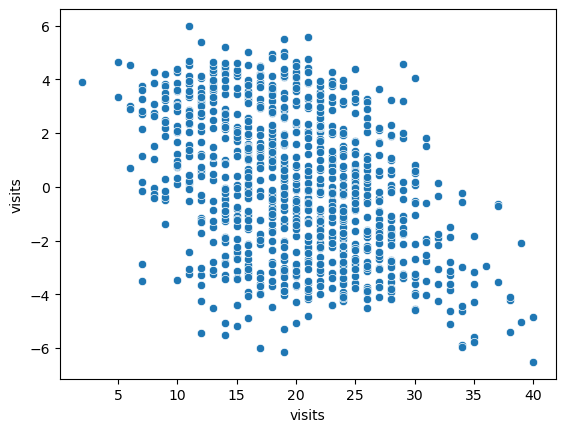

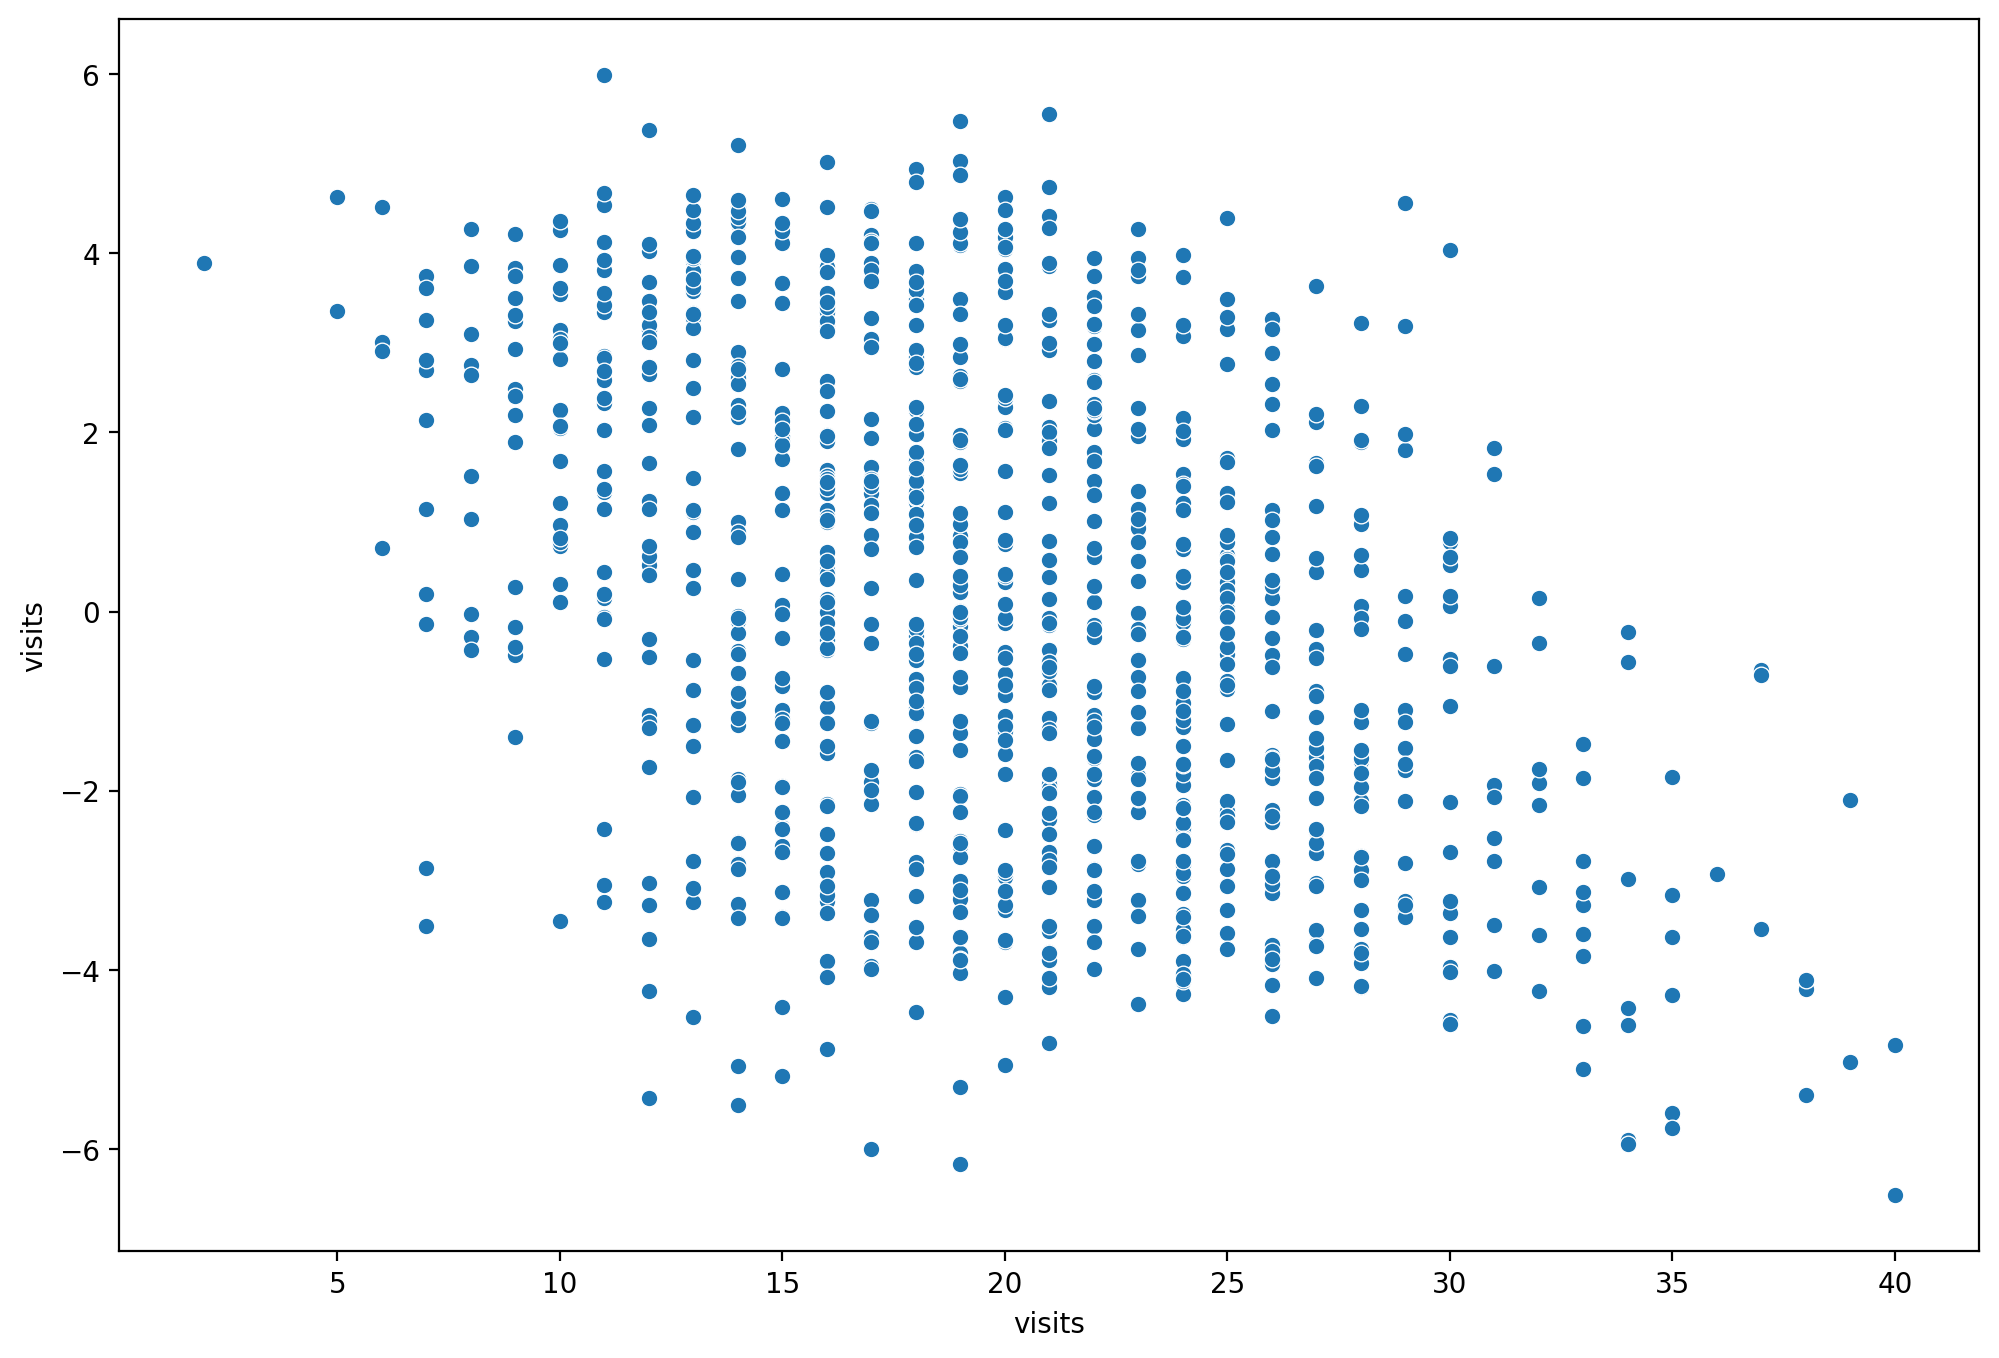

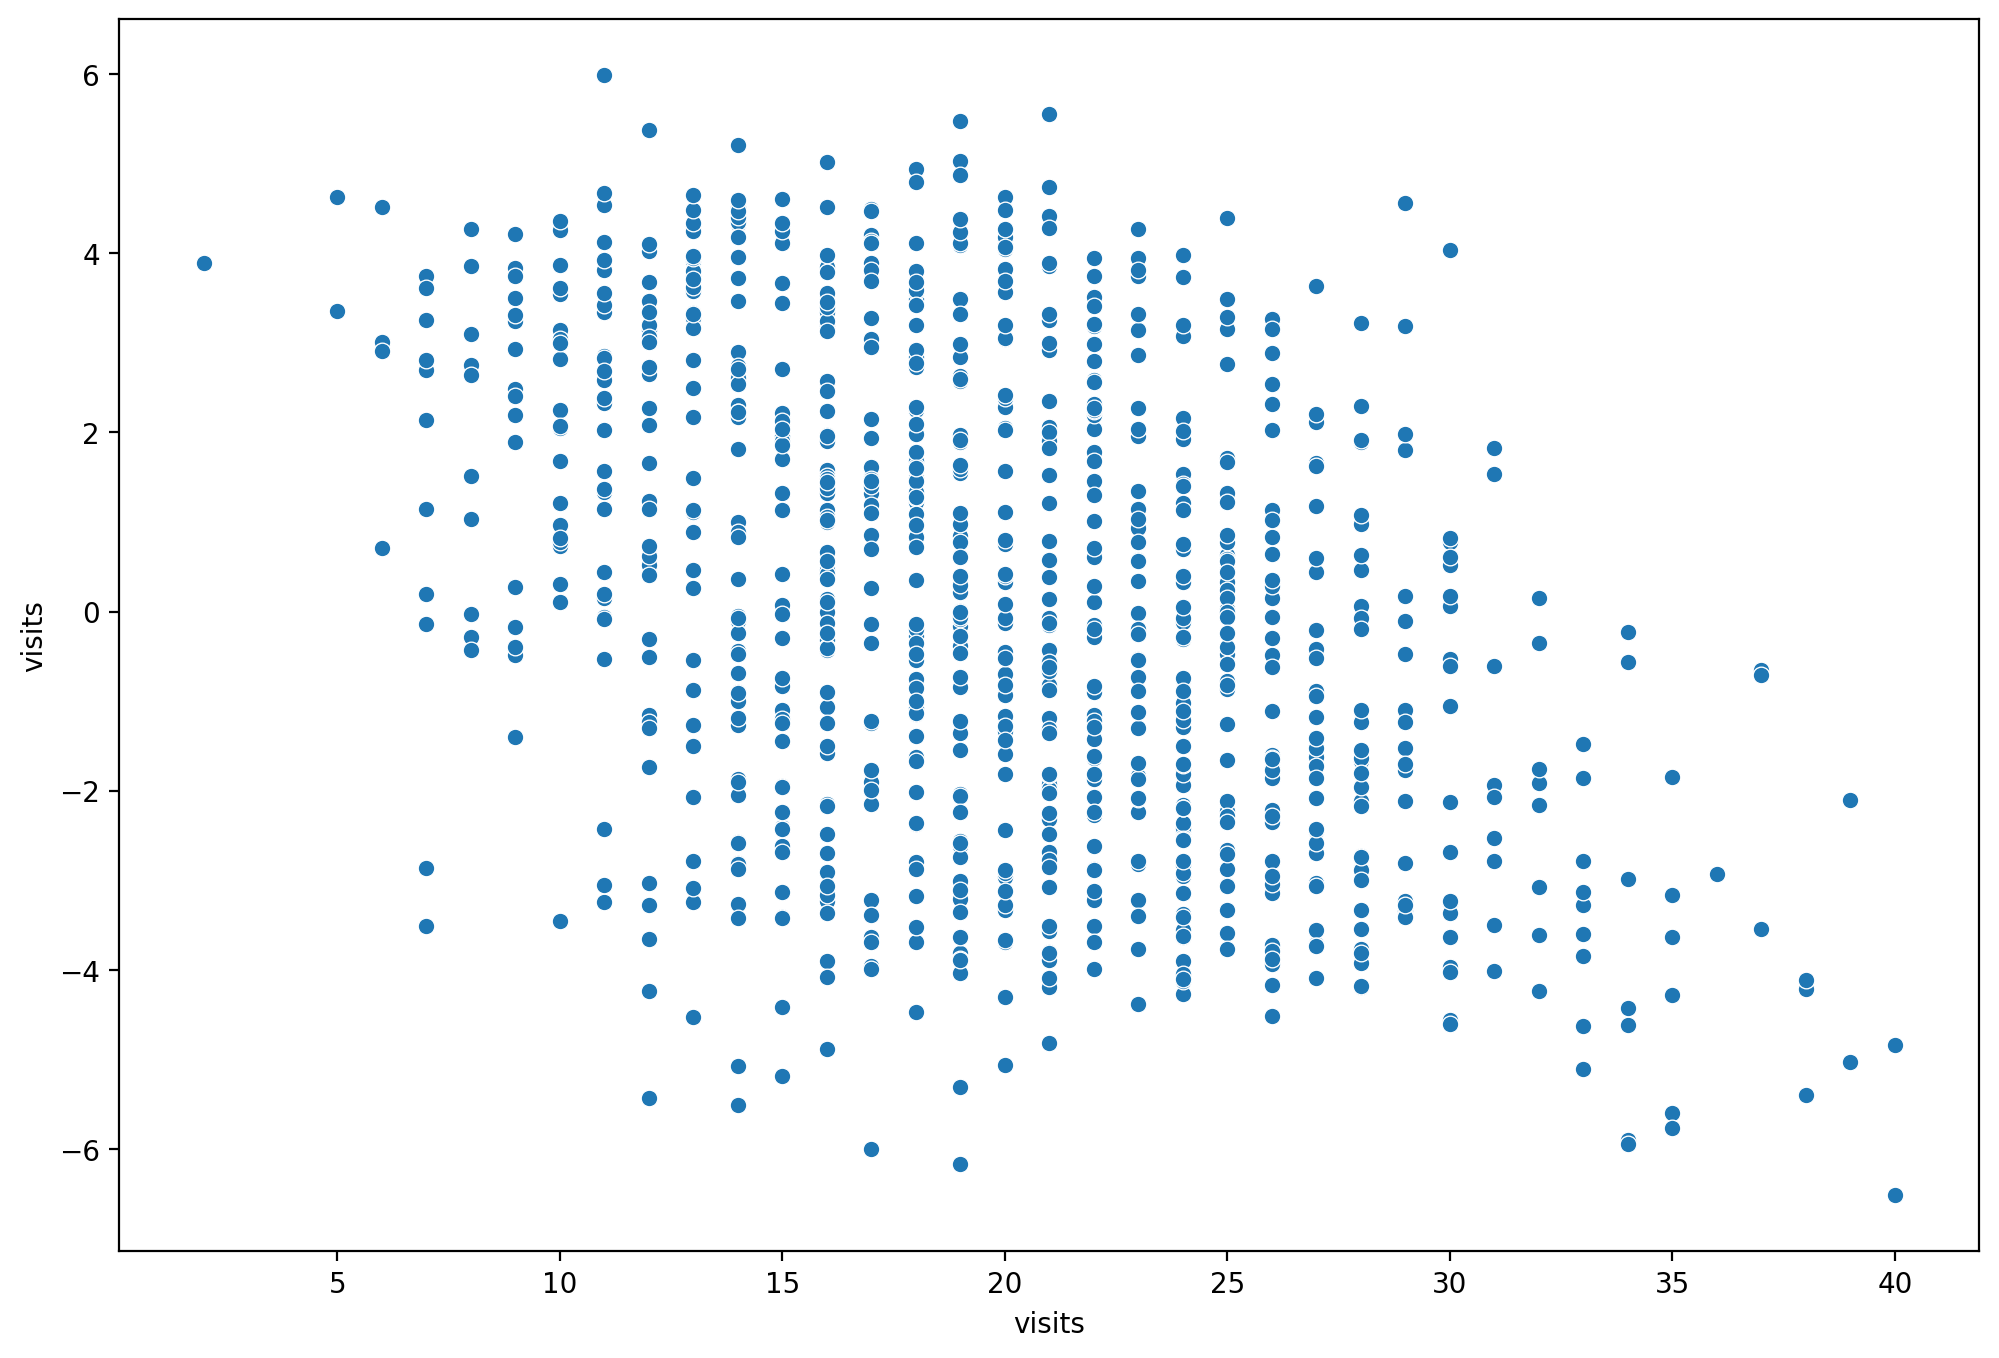

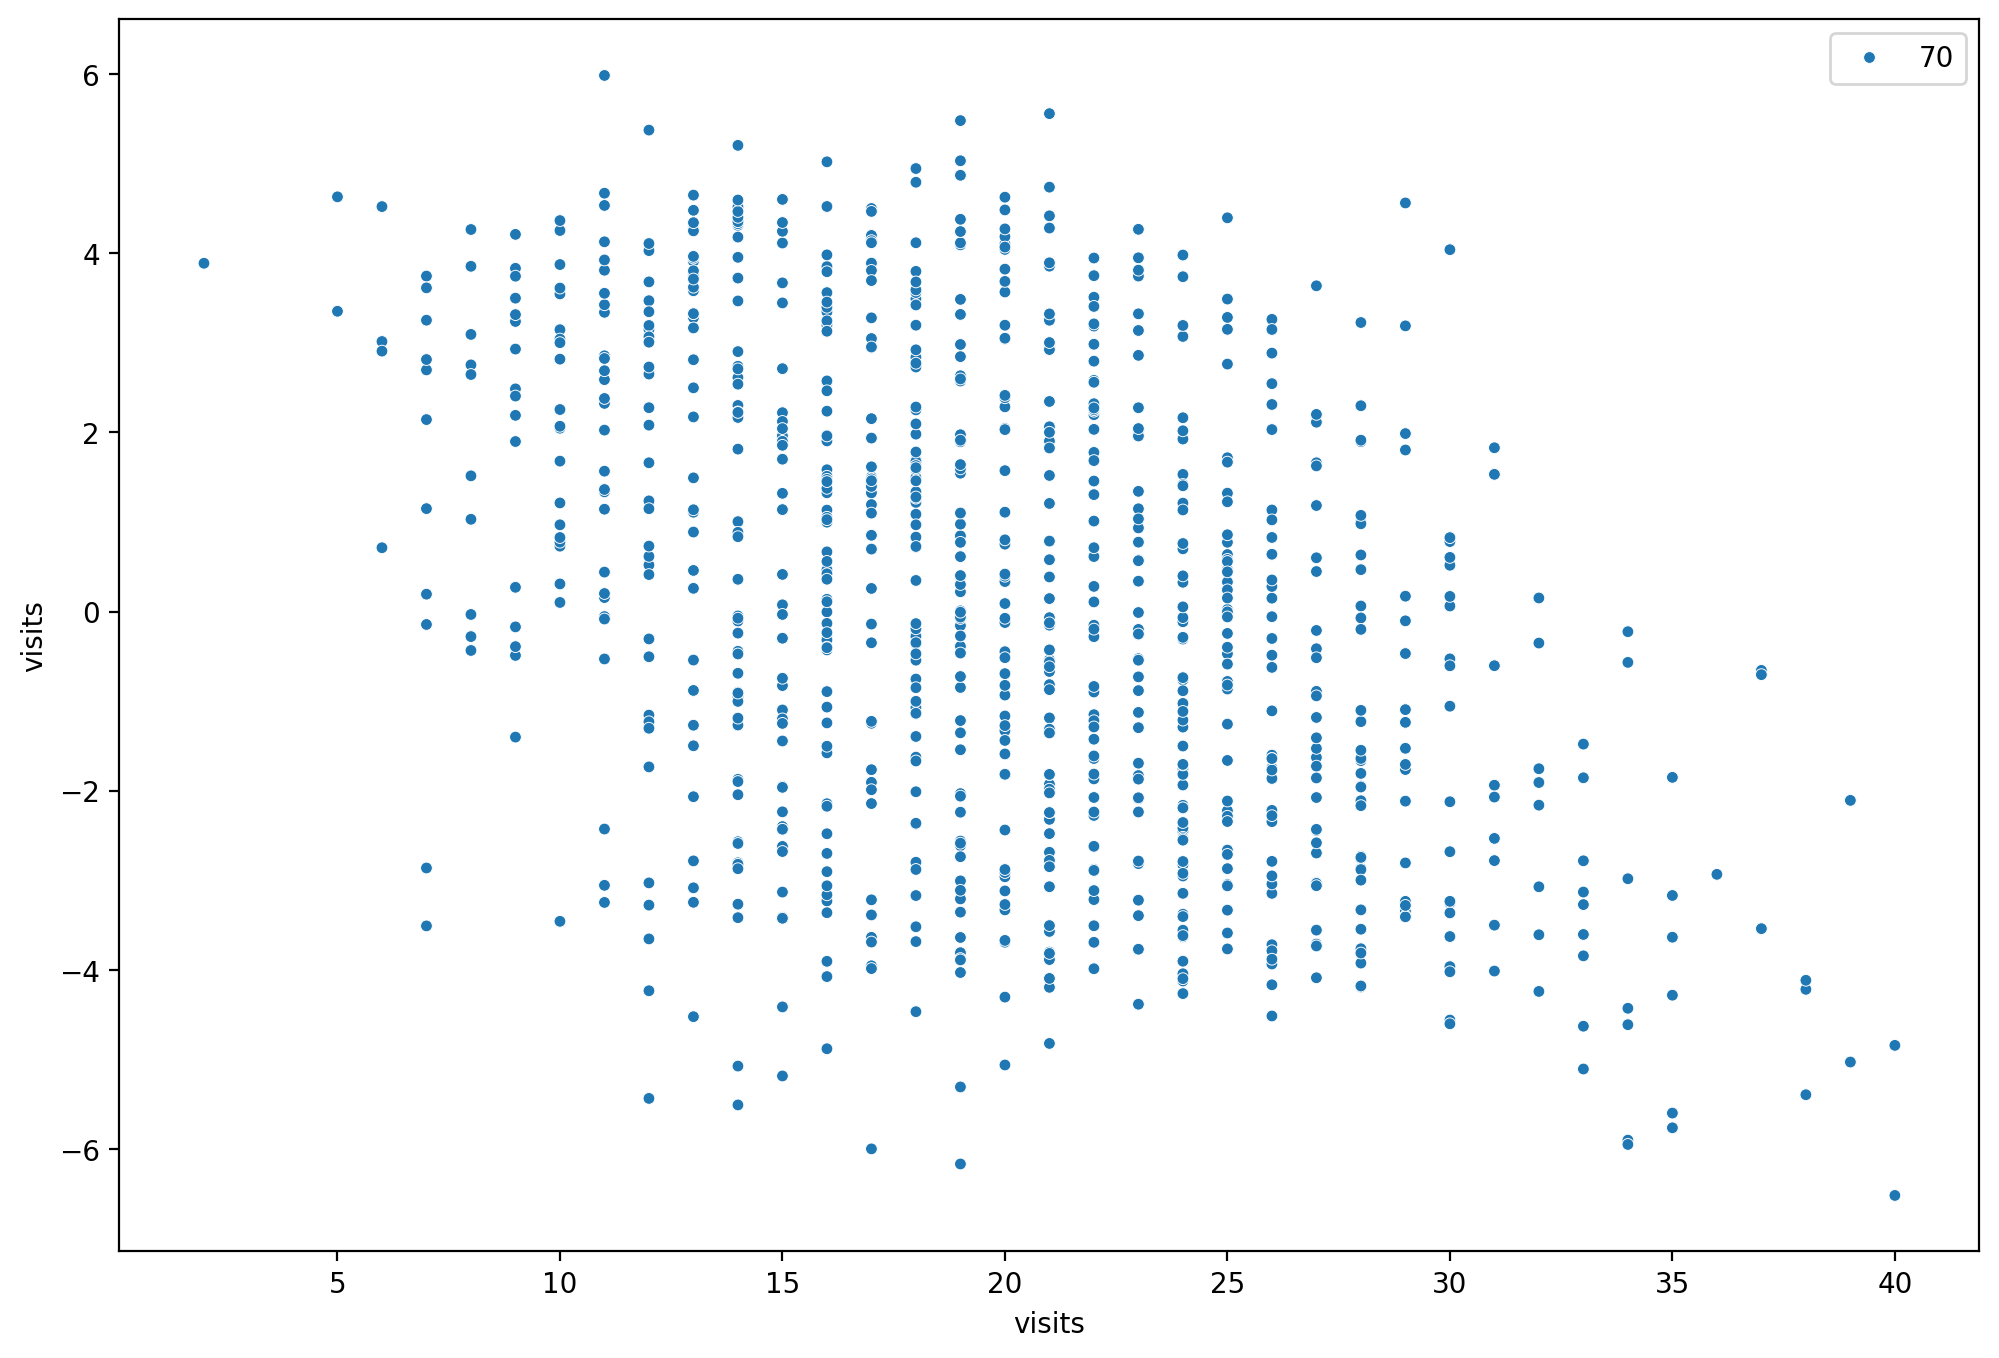

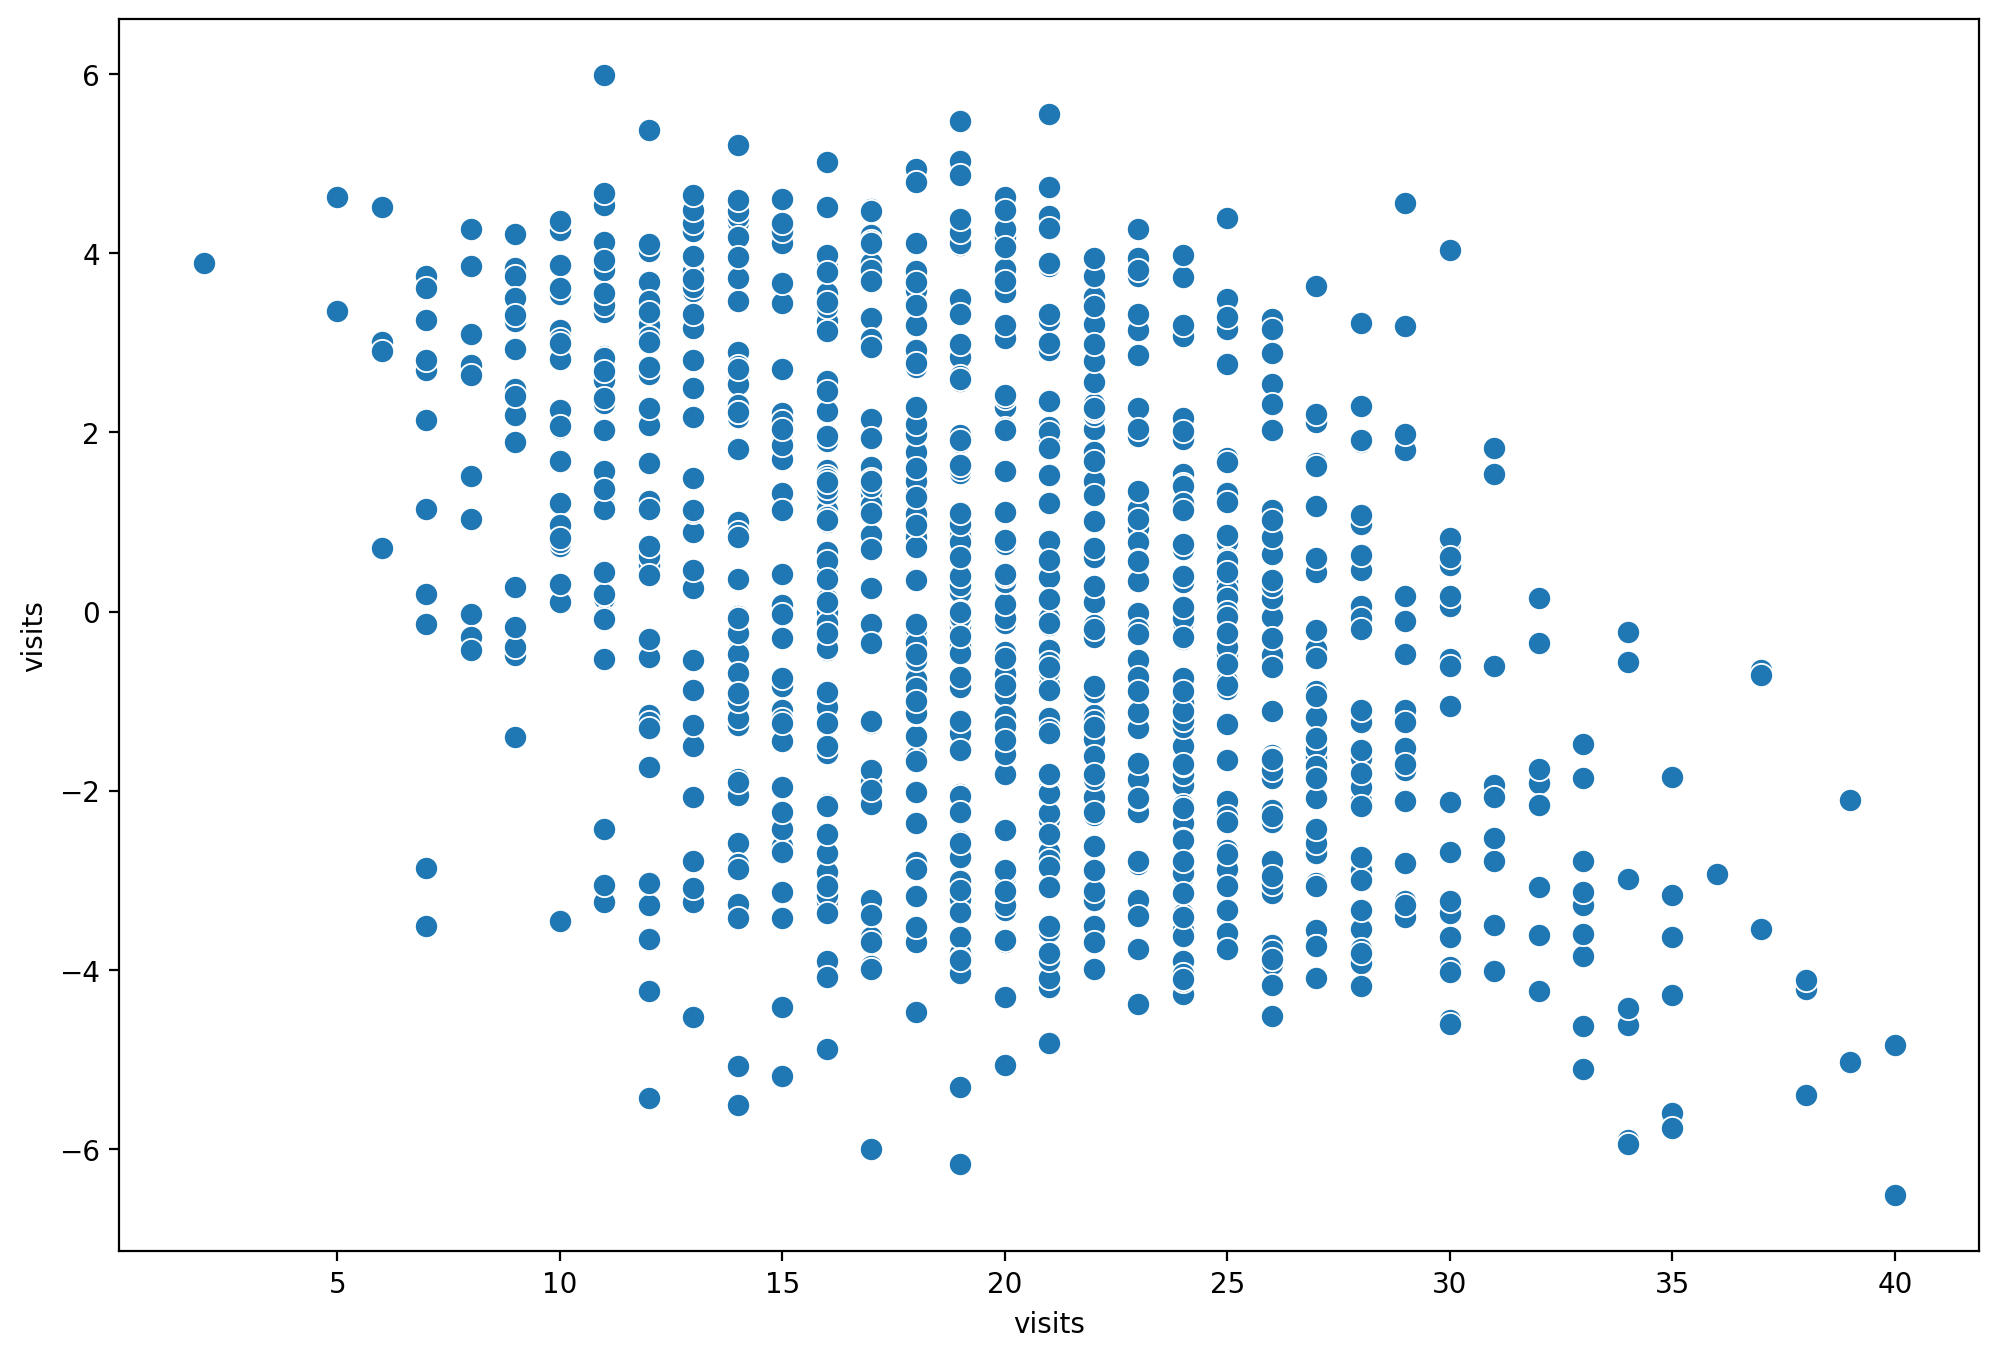

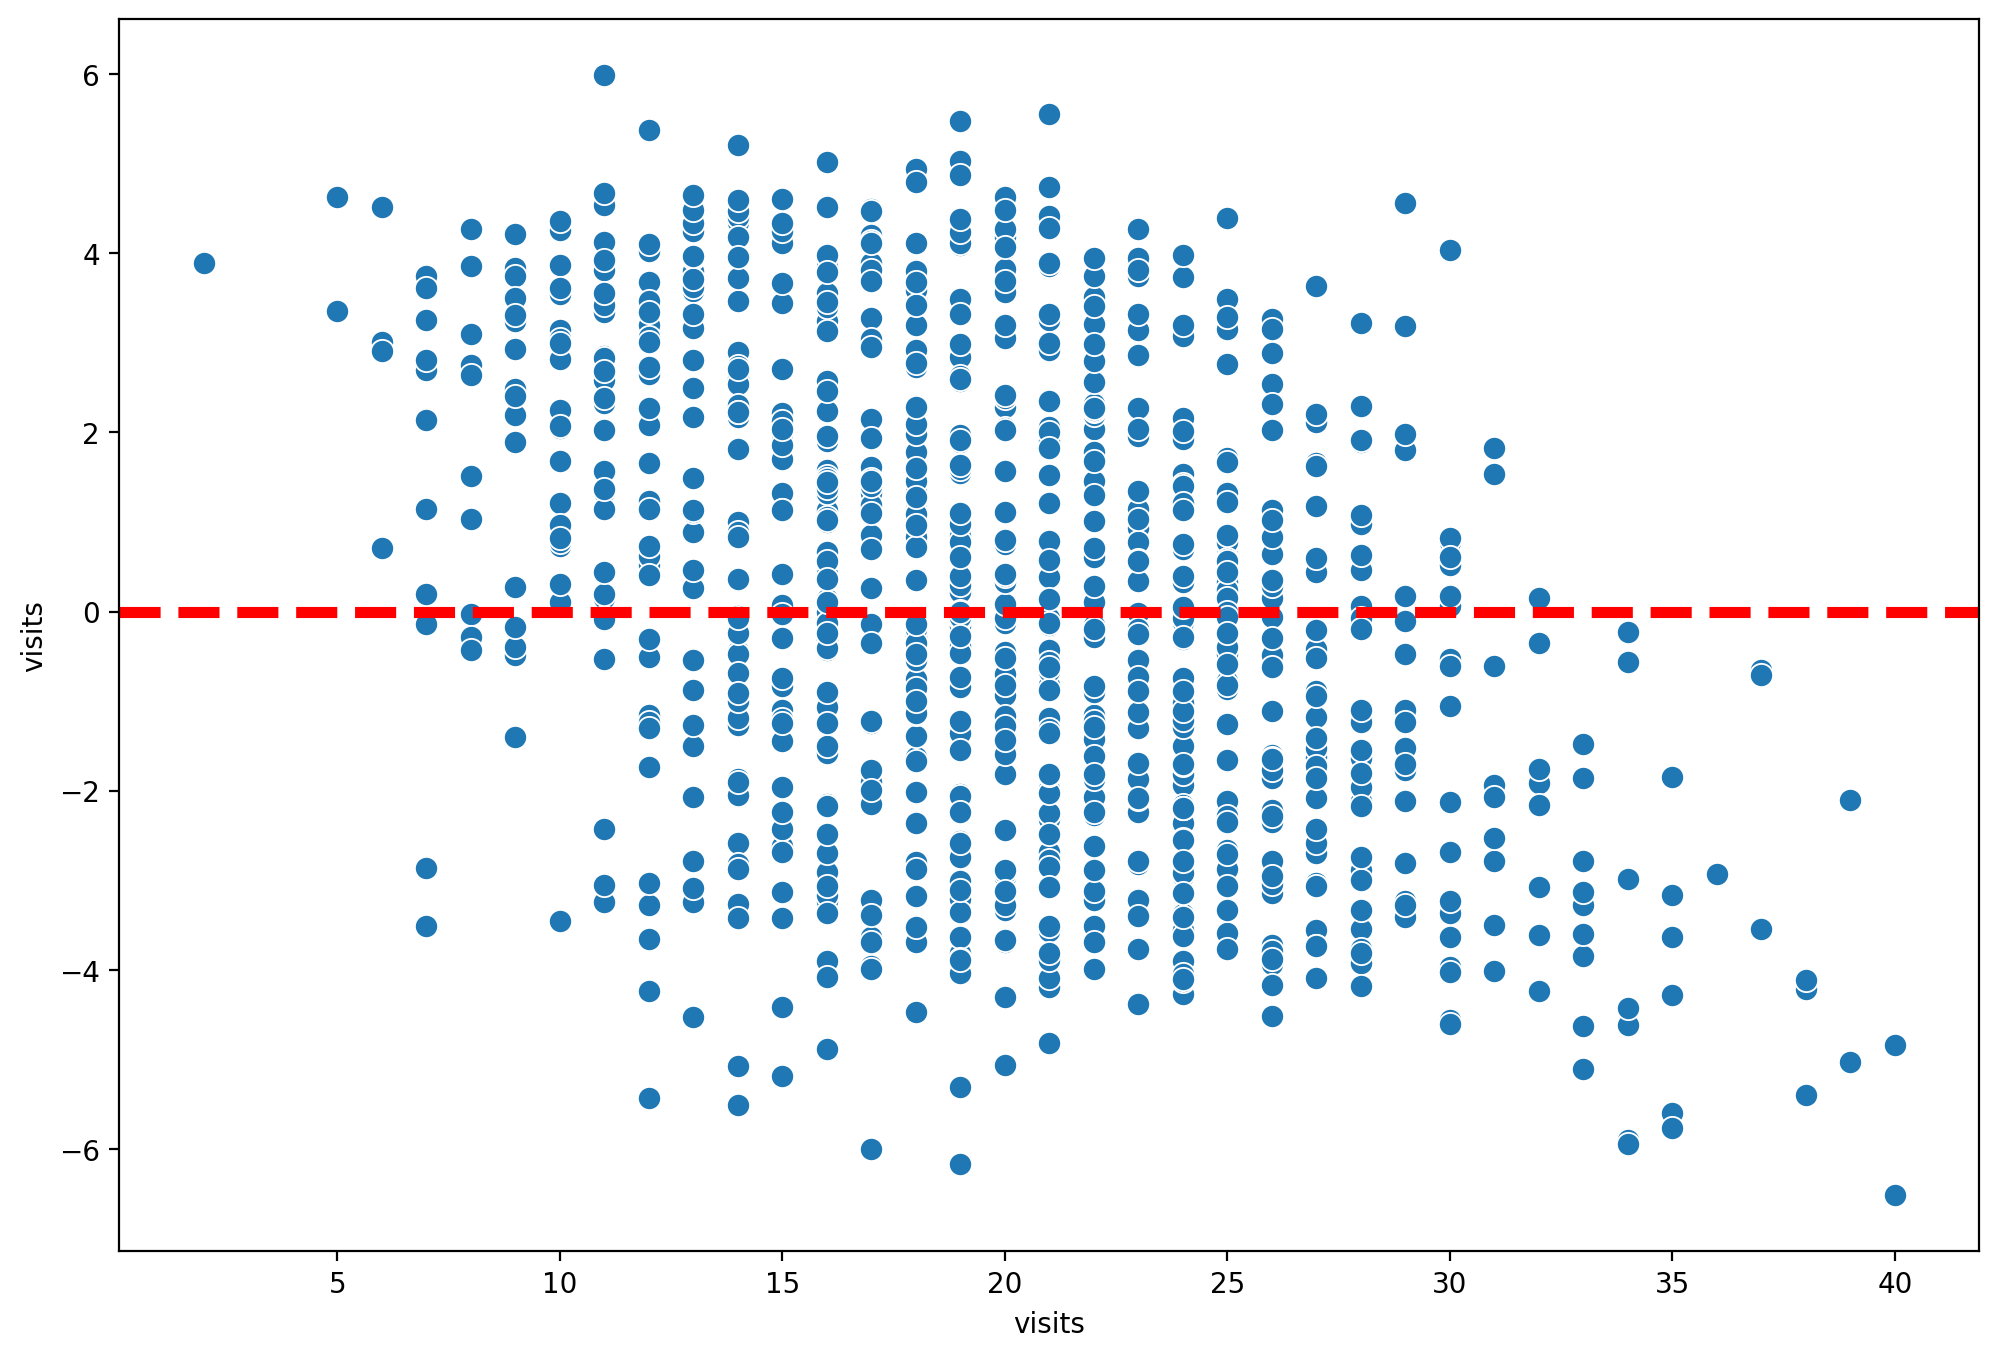

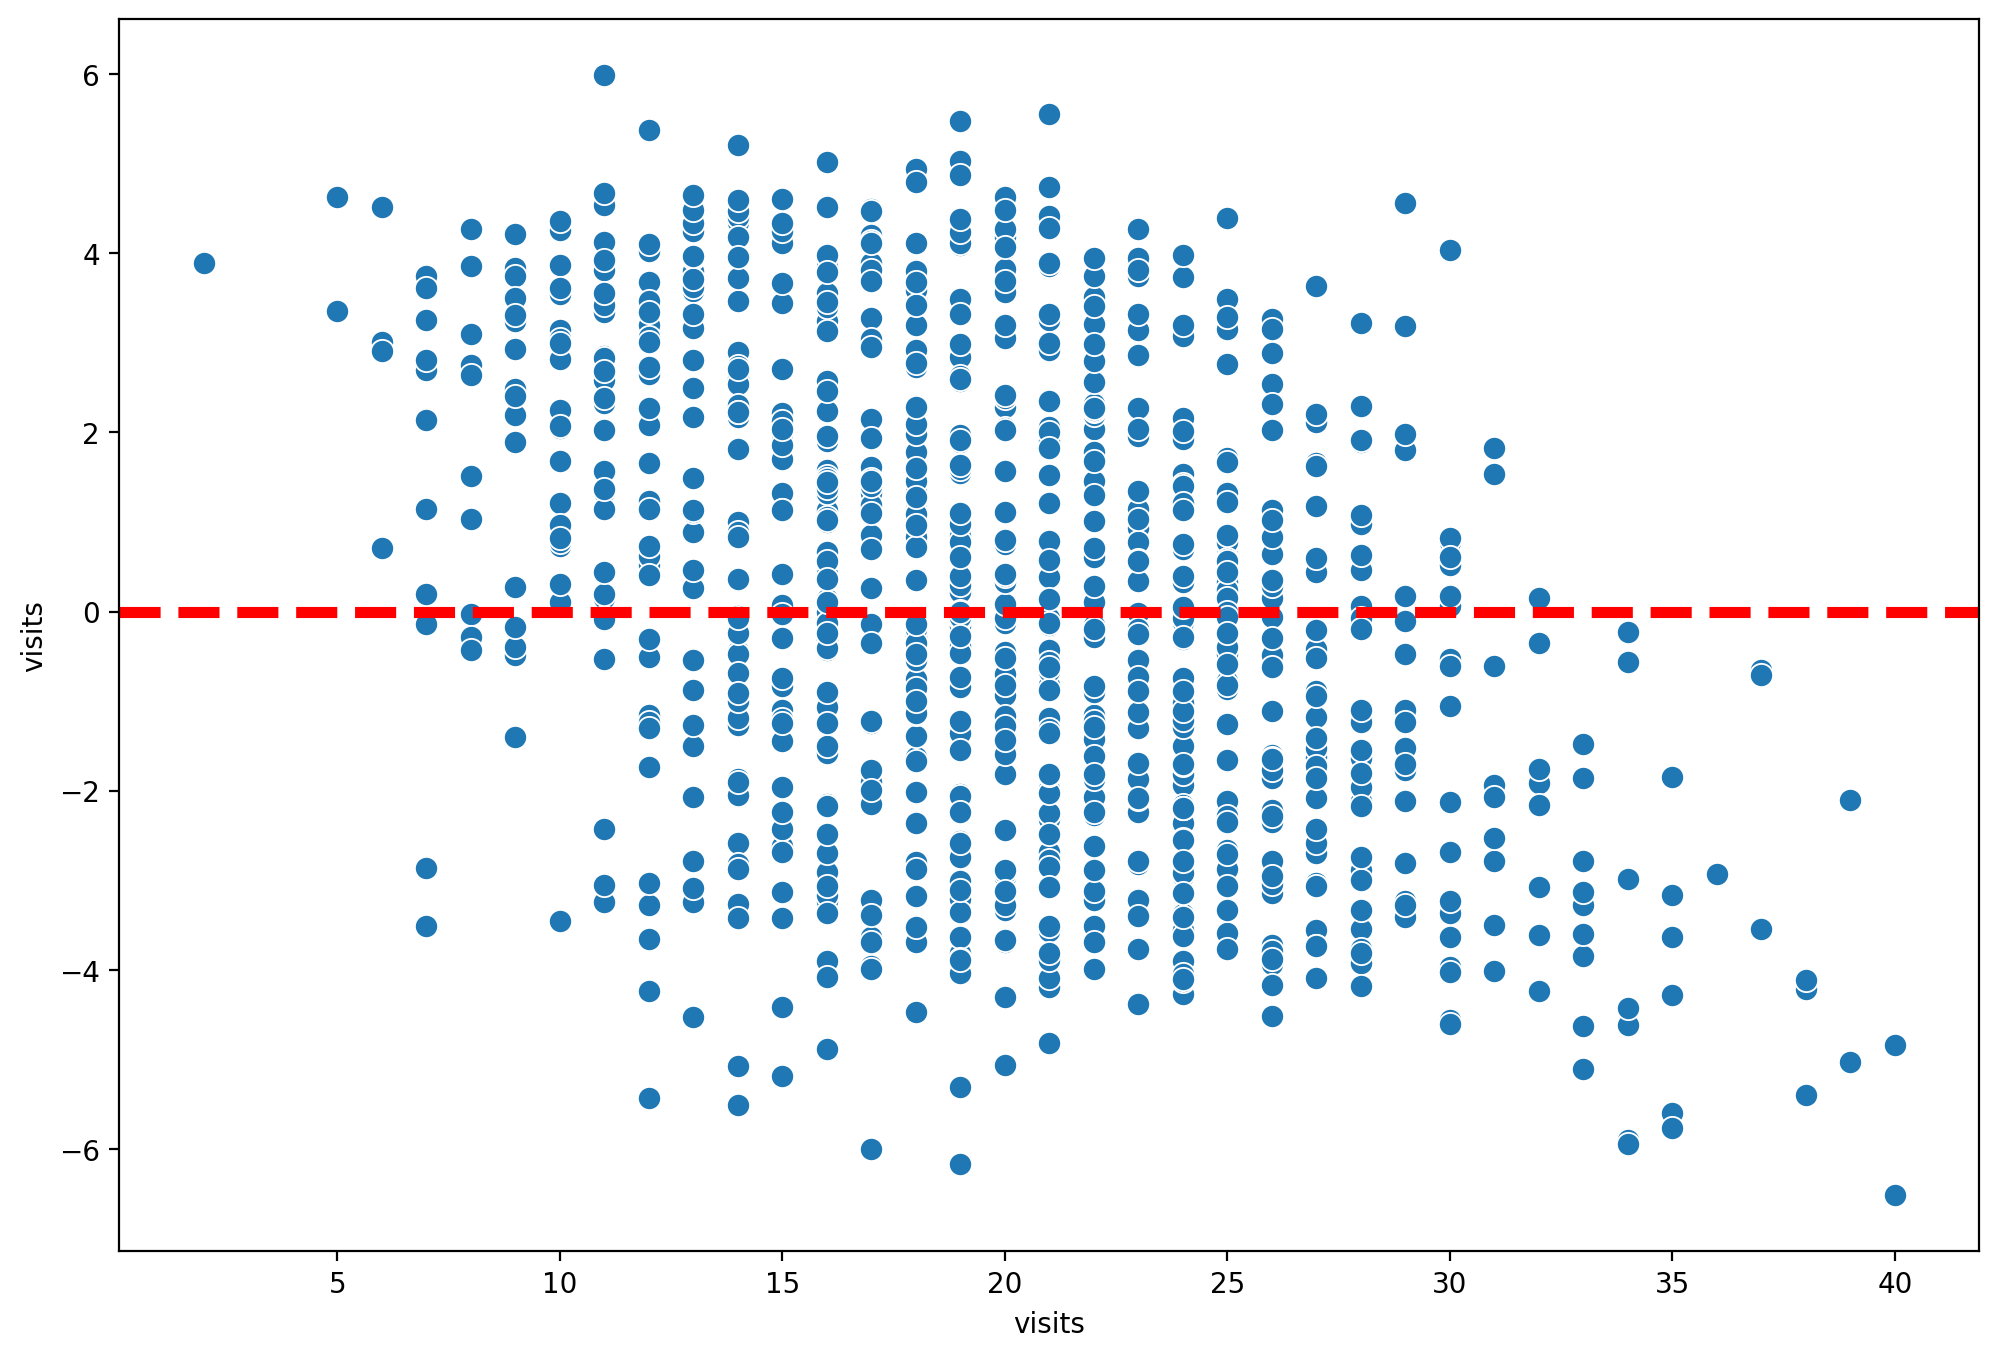

In [77]:
plt.figure(figsize=(12,8),dpi= 200)
sns.scatterplot(x=y, y=residual,s=70)
plt.axhline(y=0,color="r",ls="--",lw=4)
plt.show()

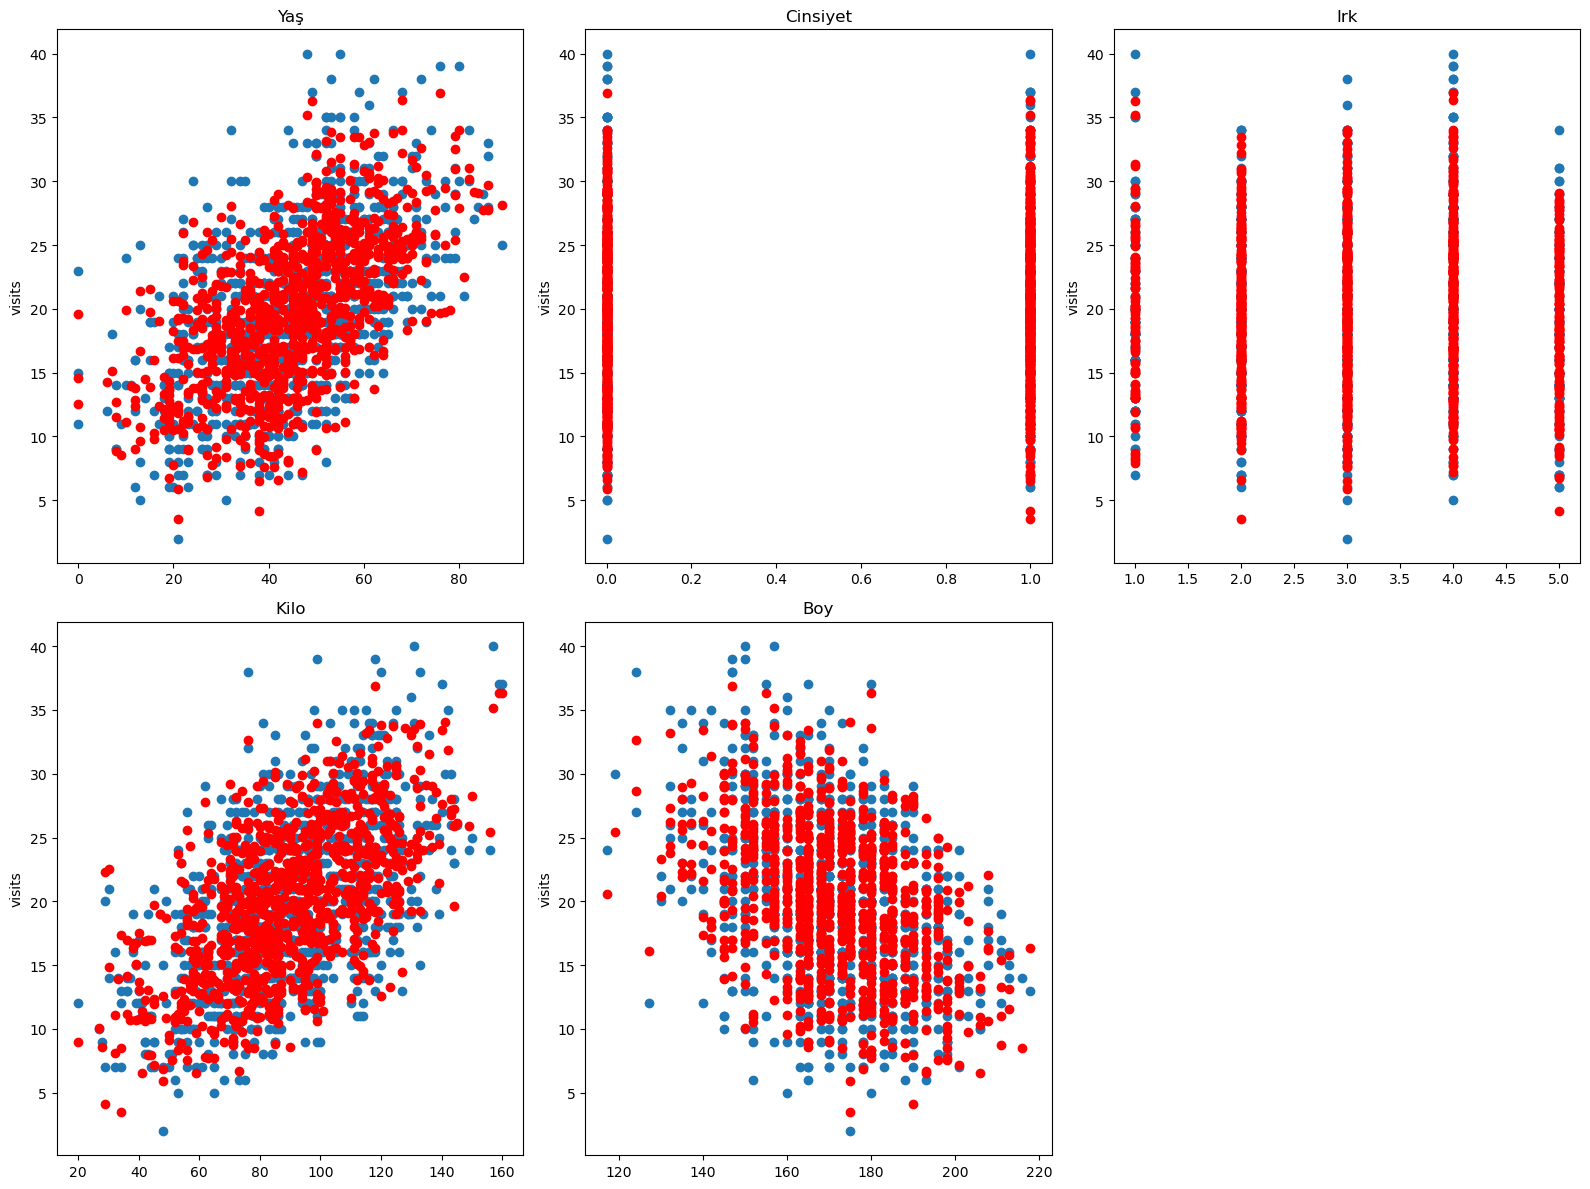

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

axes[0, 0].plot(df['yas'], df['visits'], 'o', label='Gerçek')
axes[0, 0].plot(df['yas'], y_hat, 'o', color='red', label='Tahmin')
axes[0, 0].set_ylabel("visits")
axes[0, 0].set_title("Yaş")

# 2. Cinsiyet vs Visits
axes[0, 1].plot(df['cinsiyet'], df['visits'], 'o')
axes[0, 1].plot(df['cinsiyet'], y_hat, 'o', color='red')
axes[0, 1].set_ylabel("visits")
axes[0, 1].set_title("Cinsiyet")

axes[0, 2].plot(df['irk'], df['visits'], 'o')
axes[0, 2].plot(df['irk'], y_hat, 'o', color='red')
axes[0, 2].set_ylabel("visits")
axes[0, 2].set_title("Irk")

axes[1, 0].plot(df['kilo'], df['visits'], 'o')
axes[1, 0].plot(df['kilo'], y_hat, 'o', color='red')
axes[1, 0].set_ylabel("visits")
axes[1, 0].set_title("Kilo")

axes[1, 1].plot(df['boy'], df['visits'], 'o')
axes[1, 1].plot(df['boy'], y_hat, 'o', color='red')
axes[1, 1].set_ylabel("visits")
axes[1, 1].set_title("Boy")

axes[1, 2].axis("off")

plt.tight_layout()
plt.show()
